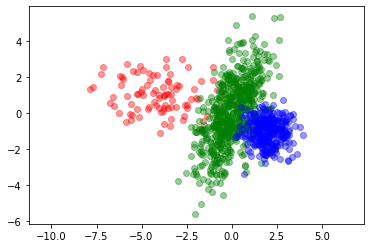

In [1]:

import autograd.numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
%matplotlib inline

# Number of data
N = 1000

# Dimension of data
D = 2

# Number of clusters
K = 3

pi = [0.1, 0.6, 0.3]
mu = [np.array([-4, 1]), np.array([0, 0]), np.array([2, -1])]
Sigma = [np.array([[3, 0],[0, 1]]), np.array([[1, 1.], [1, 3]]), .5 * np.eye(2)]

components = np.random.choice(K, size=N, p=pi)
samples = np.zeros((N, D))
# for each component, generate all needed samples
for k in range(K):
    # indices of current component in X
    indices = (k == components)
    # number of those occurrences
    n_k = indices.sum()
    if n_k > 0:
        samples[indices] = np.random.multivariate_normal(mu[k], Sigma[k], n_k)

colors = ['r', 'g', 'b', 'c', 'm']
for i in range(K):
    indices = (i == components)
    plt.scatter(samples[indices, 0], samples[indices, 1], alpha=.4, color=colors[i%K])
plt.axis('equal')
plt.show()

In [3]:
import autograd.numpy as np
from autograd.scipy.special import logsumexp
from pymanopt.manifolds import Product, Euclidean, PositiveDefinite
from pymanopt import Problem
from pymanopt.solvers import SteepestDescent

# (1) Instantiate the manifold
manifold = Product([PositiveDefinite(D+1, k=K), Euclidean(K-1)])

# (2) Define cost function
# The parameters must be contained in a list theta.
def cost(theta):
    # Unpack parameters
    nu = np.concatenate([theta[1], [0]], axis=0)
    
    S = theta[0]
    logdetS = np.expand_dims(np.linalg.slogdet(S)[1], 1)
    y = np.concatenate([samples.T, np.ones((1, N))], axis=0)

    # Calculate log_q
    y = np.expand_dims(y, 0)
    
    # 'Probability' of y belonging to each cluster
    log_q = -0.5 * (np.sum(y * np.linalg.solve(S, y), axis=1) + logdetS)

    alpha = np.exp(nu)
    alpha = alpha / np.sum(alpha)
    alpha = np.expand_dims(alpha, 1)
    
    loglikvec = logsumexp(np.log(alpha) + log_q, axis=0)
    return -np.sum(loglikvec)

problem = Problem(manifold=manifold, cost=cost, verbosity=1)

# (3) Instantiate a Pymanopt solver
solver = SteepestDescent()

# let Pymanopt do the rest
Xopt = solver.solve(problem)

Compiling cost function...
Computing gradient of cost function...
Terminated - min stepsize reached after 194 iterations, 1.45 seconds.



In [4]:

mu1hat = Xopt[0][0][0:2,2:3]
Sigma1hat = Xopt[0][0][:2, :2] - mu1hat.dot(mu1hat.T)
mu2hat = Xopt[0][1][0:2,2:3]
Sigma2hat = Xopt[0][1][:2, :2] - mu2hat.dot(mu2hat.T)
mu3hat = Xopt[0][2][0:2,2:3]
Sigma3hat = Xopt[0][2][:2, :2] - mu3hat.dot(mu3hat.T)
pihat = np.exp(np.concatenate([Xopt[1], [0]], axis=0))
pihat = pihat / np.sum(pihat)

In [5]:

print(mu[0])
print(Sigma[0])
print(mu[1])
print(Sigma[1])
print(mu[2])
print(Sigma[2])
print(pi[0])
print(pi[1])
print(pi[2])

[-4  1]
[[3 0]
 [0 1]]
[0 0]
[[1. 1.]
 [1. 3.]]
[ 2 -1]
[[0.5 0. ]
 [0.  0.5]]
0.1
0.6
0.3


# Visualizing manifolds

In [45]:
manifold = Grassmann(2, 1)

In [ ]:
# pymanopt 

In [46]:
X = torch.Tensor([[1, 0], [0, 1]])
U = torch.Tensor([[1, 0], [0, 1]])

X = torch.Tensor([[2], [2]])
U = torch.Tensor([[2], [1]])

# xx = manifold.rand() 
# xx @ manifold.randvec()
manifold.egrad2rgrad(X, U)

tensor([[-10.],
        [-11.]])

In [47]:
X = torch.Tensor([[1], [0]])

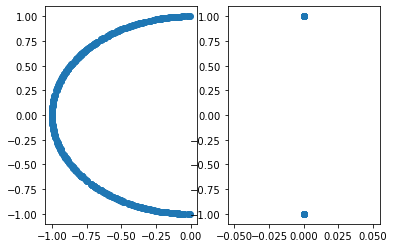

In [48]:
manifold_space = np.zeros((500, 2))
tagent_space = np.zeros((500, 2))
for i in range(500):
    manifold_space[i, :] = manifold.rand().T
    tagent_space[i, :] = manifold.randvec(X).T
    
plt.subplot(1, 2, 1)
plt.scatter(manifold_space[:, 0], manifold_space[:, 1])

plt.subplot(1, 2, 2)
plt.scatter(tagent_space[:, 0], tagent_space[:, 1])

In [53]:
X = torch.Tensor([[.5, .5]])
U = torch.Tensor([[2, 1], [1, 2]])

X_new = manifold.exp(X, U)

In [54]:
X_new, X_new @ X_new

(array([[-0.0043786, -0.9999904],
        [-0.9999904,  0.0043786]], dtype=float32),
 array([[1., 0.],
        [0., 1.]], dtype=float32))